<a href="https://colab.research.google.com/github/salnuraqidah/machine-learning/blob/main/regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Automobile_data.csv')
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Handling missing value 

In [5]:
df.replace("?",np.NAN, inplace=True)

In [7]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
df.dropna(inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
155,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
156,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
157,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [12]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [16]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']]

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,164,3.19,3.4,102,5500,13950
1,164,3.19,3.4,115,5500,17450
2,158,3.19,3.4,110,5500,17710
3,158,3.13,3.4,140,5500,23875
4,192,3.5,2.8,101,5800,16430
...,...,...,...,...,...,...
154,95,3.78,3.15,114,5400,16845
155,95,3.78,3.15,160,5300,19045
156,95,3.58,2.87,134,5500,21485
157,95,3.01,3.4,106,4800,22470


In [17]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']] = df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].astype('float')

In [20]:
df[['num-of-doors']]

,num-of-doors
0,four
1,four
2,four
3,four
4,two
...,...
154,four
155,four
156,four
157,four


In [21]:
df['num-of-doors'] = df['num-of-doors'].map({'four':4,'two':2})

In [23]:
df[['num-of-doors']]

,num-of-doors
0,4
1,4
2,4
3,4
4,2
...,...
154,4
155,4
156,4
157,4


In [24]:
df[['normalized-losses','bore','stroke','horsepower','peak-rpm','price']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  159 non-null    float64
 1   bore               159 non-null    float64
 2   stroke             159 non-null    float64
 3   horsepower         159 non-null    float64
 4   peak-rpm           159 non-null    float64
 5   price              159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


**Data Visualization**

In [25]:
numerik = df.select_dtypes(exclude='O') # Kecuali object
kategorik = df.select_dtypes(include='O')

In [27]:
numerik.columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [28]:
kategorik.columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system'],
      dtype='object')

In [29]:
import seaborn as sns

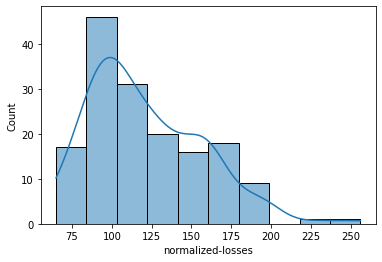

In [32]:
sns.histplot(x='normalized-losses', data = df, kde=True)
plt.show()

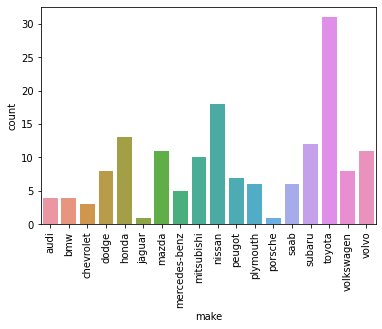

In [34]:
sns.countplot(x='make', data=df)
plt.xticks(rotation=90)
plt.show()

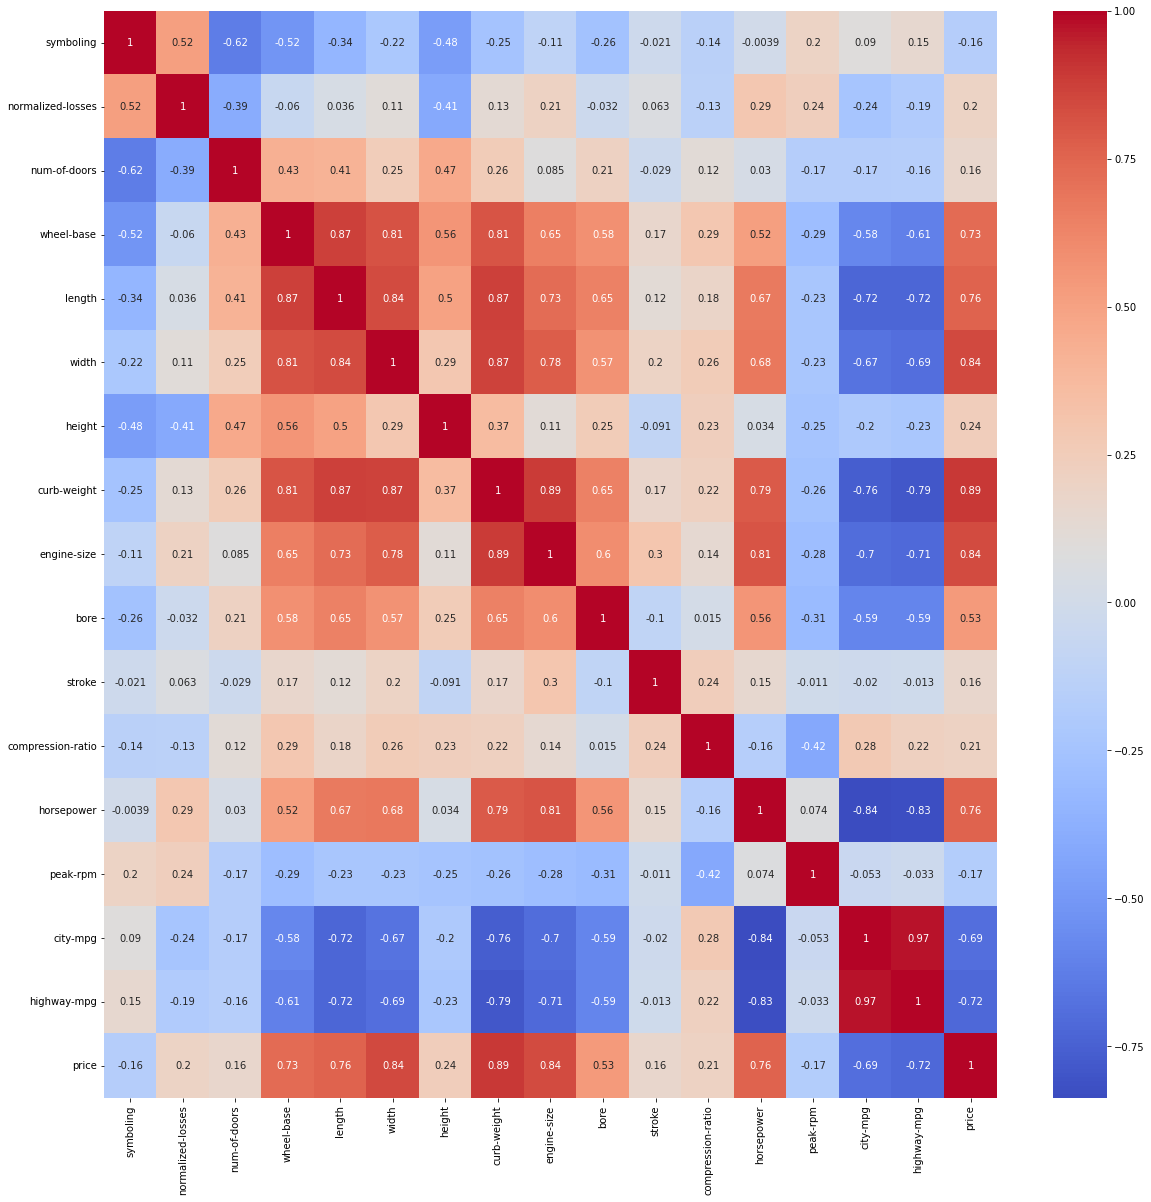

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(numerik.corr(), annot=True, cmap='coolwarm')
plt.show()

**Data Preprocessing**

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
oe = OrdinalEncoder()

In [43]:
hasil_enc = oe.fit_transform(kategorik)
hasil_enc

array([[ 0.,  1.,  0., ...,  2.,  2.,  4.],
       [ 0.,  1.,  0., ...,  2.,  1.,  4.],
       [ 0.,  1.,  0., ...,  2.,  1.,  4.],
       ...,
       [17.,  1.,  0., ...,  4.,  3.,  4.],
       [17.,  0.,  1., ...,  2.,  3.,  2.],
       [17.,  1.,  1., ...,  2.,  2.,  4.]])

In [44]:
data_cat = pd.DataFrame(hasil_enc, columns=kategorik.columns).astype('int')

In [45]:
data_cat

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,0,1,0,3,1,0,2,2,4
1,0,1,0,3,0,0,2,1,4
2,0,1,0,3,1,0,2,1,4
3,0,1,1,3,1,0,2,1,4
4,1,1,0,3,2,0,2,2,4
...,...,...,...,...,...,...,...,...,...
154,17,1,0,3,2,0,2,2,4
155,17,1,1,3,2,0,2,2,4
156,17,1,0,3,2,0,4,3,4
157,17,0,1,3,2,0,2,3,2


In [48]:
df_new = pd.concat([numerik, data_cat],axis=1)

In [49]:
df_new

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,...,price,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,2,164.0,4,99.8,176.6,66.2,54.3,2337,109,3.19,...,13950.0,0,1,0,3,1,0,2,2,4
1,2,164.0,4,99.4,176.6,66.4,54.3,2824,136,3.19,...,17450.0,0,1,0,3,0,0,2,1,4
2,1,158.0,4,105.8,192.7,71.4,55.7,2844,136,3.19,...,17710.0,0,1,0,3,1,0,2,1,4
3,1,158.0,4,105.8,192.7,71.4,55.9,3086,131,3.13,...,23875.0,0,1,1,3,1,0,2,1,4
4,2,192.0,2,101.2,176.8,64.8,54.3,2395,108,3.50,...,16430.0,1,1,0,3,2,0,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,-1,95.0,4,109.1,188.8,68.9,55.5,2952,141,3.78,...,16845.0,17,1,0,3,2,0,2,2,4
155,-1,95.0,4,109.1,188.8,68.8,55.5,3049,141,3.78,...,19045.0,17,1,1,3,2,0,2,2,4
156,-1,95.0,4,109.1,188.8,68.9,55.5,3012,173,3.58,...,21485.0,17,1,0,3,2,0,4,3,4
157,-1,95.0,4,109.1,188.8,68.9,55.5,3217,145,3.01,...,22470.0,17,0,1,3,2,0,2,3,2


In [51]:
X = df_new.drop(columns='price')
y = df_new['price']

**Train test split**

In [52]:
from sklearn.model_selection import train_test_split


In [53]:
X_train, x_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=10)

In [54]:
print(X_train.shape)
print(x_test.shape)

(127, 25)
(32, 25)


**Modelling**

In [55]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [58]:
lr = LinearRegression()
rg = Ridge()
ls = Lasso()
svr = SVR(kernel='linear')
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()

In [59]:
lr.fit(X_train,y_train)
rg.fit(X_train,y_train)
ls.fit(X_train,y_train)
svr.fit(X_train,y_train)
dtr.fit(X_train,y_train)
rfr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+08, tolerance: 4.404e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


RandomForestRegressor()

In [61]:
lr_score = lr.score(x_test,y_test)
rg_score = rg.score(x_test,y_test)
ls_score = ls.score(x_test,y_test)
svr_score = svr.score(x_test,y_test)
dtr_score = dtr.score(x_test,y_test)
rfr_score = rfr.score(x_test,y_test)

In [62]:
key = ['Linear Regression','Ridge','Lasso','SVR','Decision Tree Regressor', 'Random Forest Regressor']
score = [lr_score,rg_score,ls_score,svr_score,dtr_score,rfr_score]

[]

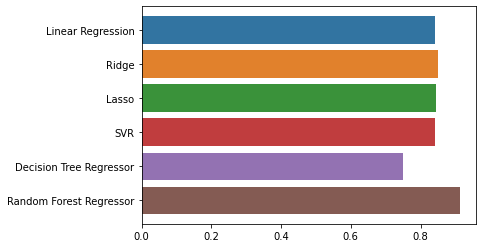

In [63]:
sns.barplot(y=key, x=score)
plt.plot()